# 数据可视化内容二 

## 如何使用pandas绘图

## 1.导入包

In [92]:
#数据分析包
import pandas as pd

#导入互联网数据获取包
from pandas_datareader import data


## 2.6家公司（GAFATA）

In [93]:
#字典，6家公司的股票
gafataDict={'谷歌':'GOOG','亚马逊':'AMZN','Facebook':'FB',
            '苹果':'AAPL','阿里巴巴':'BABA','腾讯':'0700.hk'}  


In [94]:
'''
定义函数
函数功能：计算股票涨跌幅=（现在股价-买入价格）/买入价格
输入参数：column是收盘价这一列的数据
返回数据：涨跌幅
def 使用时注意缩进，放到最前面，
print使用时要缩进4个字符位置
'''
def change(column):
    buyPrice=column[0] #买入价格
     #column.size是总共数据条数，序号是从0开始的，所以最后一条数据的序号是总数目-1
    curPrice=column[column.size-1] #现在价格 
    priceChange=(curPrice-buyPrice)/buyPrice #累计涨跌幅
    #判断股票是上涨，还是下跌
    if(priceChange>0):
        print('股票累计上涨=',priceChange*100,'%')
    elif(priceChange==0):
        print('股票没有变化',priceChange*100,'%')
    else:
        print('股票累计下跌',priceChange*100,'%')
     #返回数据
    return priceChange


## 3、获取股票数据-阿里巴巴

In [97]:
#获取哪段时间范围内的股票数据
start_date='2020-01-01'
end_date='2021-01-01'
#获取阿里巴巴股票数据
babaDf=data.get_data_yahoo(gafataDict['阿里巴巴'],start_date,end_date)

In [98]:
babaDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,213.639999,210.729996,212.000000,212.100006,6773600,212.100006
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005


In [99]:
#股票数据的行索引是时间序列类型，记录每天的股票信息
babaDf.index

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=254, freq=None)

In [100]:
#信息查看
babaDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    int64  
 5   Adj Close  254 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


In [24]:
#查看类型大小
babaDf.shape

(254, 6)

In [25]:
babaDf.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [26]:
#查看数据统计信息
babaDf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,242.689855,236.329398,239.786449,239.774410,1.834307e+07,239.774410
std,36.051832,35.364960,35.876594,35.795581,1.231134e+07,35.795581
min,178.500000,169.949997,175.270004,176.339996,6.231400e+06,176.339996
25%,212.794998,207.544998,209.877495,210.417496,1.218322e+07,210.417496
50%,230.200005,224.705002,228.267502,226.959999,1.587965e+07,226.959999
75%,270.642509,263.085007,267.095001,266.017494,2.027810e+07,266.017494
max,319.320007,308.910004,313.500000,317.140015,1.418300e+08,317.140015


In [27]:
'''
累计涨幅
'''
#获取收盘价Close这一列的数据 
closeCol=babaDf['Close']
#调用函数，获取涨跌幅
babaChange=change(closeCol)

股票累计上涨= 9.726538911062054 %


## 谷歌

In [28]:
#获取谷歌股票数据
googDf=data.get_data_yahoo(gafataDict['谷歌'],start_date,end_date)
googDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800,1337.020020
2020-01-02,1368.140015,1341.550049,1341.550049,1367.369995,1406600,1367.369995
2020-01-03,1372.500000,1345.543945,1347.859985,1360.660034,1186400,1360.660034
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961
2020-01-07,1402.989990,1390.380005,1397.939941,1393.339966,1502700,1393.339966


In [29]:
#累计涨幅
#获取收盘价Close这一列的数据 
closeCol=googDf['Close']
#调用函数，获取涨跌幅
googChange=change(closeCol)

股票累计上涨= 31.02870408006378 %


## 亚马逊

In [30]:
amazDf=data.get_data_yahoo(gafataDict['亚马逊'],start_date,end_date)
amazDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,1853.260010,1832.229980,1842.0,1847.839966,2506500,1847.839966
2020-01-02,1898.010010,1864.150024,1875.0,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.5,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.0,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.5,1906.859985,4044900,1906.859985


In [31]:
#累计涨幅
closeCol=amazDf['Close']
amazChange=change(closeCol)

股票累计上涨= 76.25606069163973 %


## Facebook

In [33]:
FbDf=data.get_data_yahoo(gafataDict['Facebook'],start_date,end_date)
FbDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,205.559998,203.600006,204.000000,205.250000,8953500,205.250000
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998


In [34]:
#累计股票
closeCol=FbDf['Close']
FbChange=change(closeCol)

股票累计上涨= 33.0864816867768 %


## 苹果

In [36]:
AppDf=data.get_data_yahoo(gafataDict['苹果'],start_date,end_date)
AppDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.552094
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.207466
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.486023
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.071579
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.723213


In [37]:
#累计涨幅
closeCol=AppDf['Close']
AppChange=change(closeCol)

股票累计上涨= 80.74579288182282 %


## 腾讯

In [49]:
#txDf=data.get_data_yahoo(gafataDict['腾讯'],start_date,end_date)
txDf=data.get_data_yahoo(gafataDict['腾讯'],start_date,end_date)
txDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,384.799988,375.600006,375.799988,382.399994,13991006.0,380.297546
2020-01-03,390.000000,381.200012,388.000000,383.000000,15313106.0,380.894257
2020-01-06,380.000000,375.399994,380.000000,377.399994,12123194.0,375.325012
2020-01-07,387.799988,380.000000,380.799988,385.600006,17686346.0,383.479980
2020-01-08,385.799988,379.200012,382.399994,382.000000,15529153.0,379.899750


In [50]:
#腾讯是港股，所以这里的收盘价是港币，按照今天的汇率将其转化为美元
exchange=0.1278 #港币兑换美元的汇率，这个值可以根据在网上查到当天的最新汇率
#为了方便后期多家公司的股价比较，增加新的一列收盘价（美元）
txDf['Close_dollar']= txDf['Close']* exchange
txDf.head()

,High,Low,Open,Close,Volume,Adj Close,Close_dollar
Date,,,,,,,
2020-01-02,384.799988,375.600006,375.799988,382.399994,13991006.0,380.297546,48.870719
2020-01-03,390.000000,381.200012,388.000000,383.000000,15313106.0,380.894257,48.947400
2020-01-06,380.000000,375.399994,380.000000,377.399994,12123194.0,375.325012,48.231719
2020-01-07,387.799988,380.000000,380.799988,385.600006,17686346.0,383.479980,49.279681
2020-01-08,385.799988,379.200012,382.399994,382.000000,15529153.0,379.899750,48.819600


In [52]:
#累计涨幅
closeCol=txDf['Close']
txChange=change(closeCol)

股票累计上涨= 48.01255466369493 %


# 数据可视化

In [65]:
%matplotlib inline
#导入可视化包
import matplotlib.pyplot as plt

In [66]:
#将索引中x坐标轴转化成时间序列
babaDf.reset_index(inplace=True)
babaDf.set_index('Date',inplace=True)
#查看索引重置是否成功
babaDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,213.639999,210.729996,212.000000,212.100006,6773600,212.100006
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005


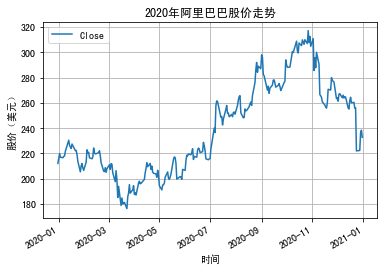

In [67]:
babaDf.plot(use_index=True, #此时不能直接用x值，会直接访问index.values的值，即数字类型，而不是时间类型
            y='Close')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴
plt.ylabel('股价（美元）')
#图片标题
plt.title('2020年阿里巴巴股价走势')
#显示网格
plt.grid(True)
#显示图形
plt.show()

### 散点图：成交量和股价

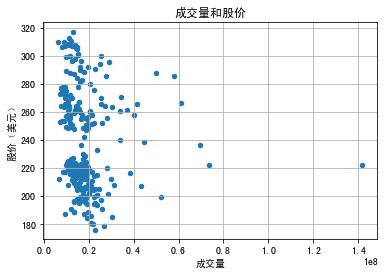

In [68]:
'''我们给plot传入的横轴x坐标轴数据成交量这一列的数据，
纵轴y坐标轴数据是收盘价这一列的数据，
同时增加了一个参数叫kind这个值表示绘制图形的类型，这里的值等于scatter表示绘制散点图。
kind取值（图形类型）参考官方文档：http://pandas.pydata.org/pandas-docs/stable/visualization.html
kind取值  图形类型
  无        折线图
scatter     散点图
bar         柱状图
box         箱线图
hist        直方图
pie         饼状图
area        面积图
'''
babaDf.plot(x='Volume',y='Close',kind='scatter')
#x坐标轴文本
plt.xlabel('成交量')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('成交量和股价')
#显示网格
plt.grid(True)
#显示图形
plt.show()

### 相关系数矩阵

In [69]:
babaDf.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.996920,0.997134,0.997804,-0.101619,0.997804
Low,0.996920,1.000000,0.996914,0.997516,-0.148405,0.997516
Open,0.997134,0.996914,1.000000,0.994319,-0.117809,0.994319
Close,0.997804,0.997516,0.994319,1.000000,-0.122003,1.000000
Volume,-0.101619,-0.148405,-0.117809,-0.122003,1.000000,-0.122003
Adj Close,0.997804,0.997516,0.994319,1.000000,-0.122003,1.000000


### GAFATA股价走势比较

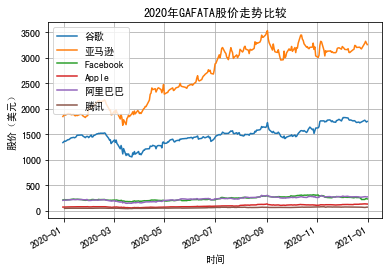

In [74]:
#绘制goggle的画纸,通过指定画纸ax，在同一张画纸上绘图
ax1=googDf.plot(use_index=True,y='Close',label='谷歌')
#亚马逊
amazDf.plot(ax=ax1,y='Close',label='亚马逊')
#阿里巴巴
babaDf.plot(ax=ax1,y='Close',label='Facebook')
#苹果
AppDf.plot(ax=ax1,y='Close',label='Apple')
#Facebook
FbDf.plot(ax=ax1,y='Close',label='阿里巴巴')
#腾讯
txDf.plot(ax=ax1,y='Close_dollar',label='腾讯')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('2020年GAFATA股价走势比较')
#显示网格
plt.grid(True)
plt.show()

因为谷歌和亚马逊的股价比较高，造成我们看不出其他4家公司的股票走势。 所以根据股价我们可以将这6家公司分成2组，一组是股价较高的谷歌和亚马逊。另外一组是股价较低的4家公司。

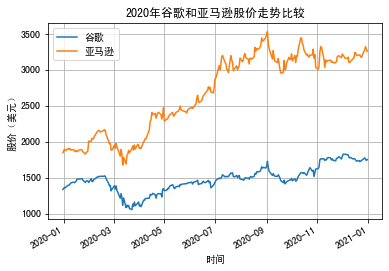

In [75]:
'''
第一组：谷歌，亚马逊
'''
#绘制goggle的画纸,通过指定画纸ax，在同一张画纸上绘图
ax2=googDf.plot(use_index=True,y='Close',label='谷歌')
#亚马逊
amazDf.plot(ax=ax2,y='Close',label='亚马逊')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('2020年谷歌和亚马逊股价走势比较')
#显示网格
plt.grid(True)
plt.show()

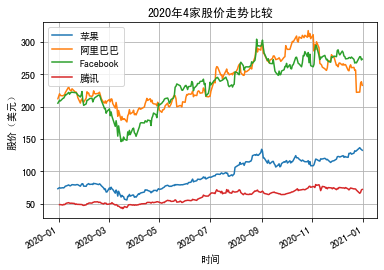

In [79]:
'''
第二组：苹果，阿里巴巴，Facebook,腾讯
'''
#绘制苹果的画纸,通过指定画纸ax，在同一张画纸上绘图
ax3=AppDf.plot(use_index=True,y='Close',label='苹果')
#阿里巴巴
babaDf.plot(ax=ax3,y='Close',label='阿里巴巴')
#Facebook
FbDf.plot(ax=ax3,y='Close',label='Facebook')
#腾讯
txDf.plot(ax=ax3,y='Close_dollar',label='腾讯')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('2020年4家股价走势比较')
#显示网格
plt.grid(True)
plt.show()

### 柱状图：这六家公司的平均值

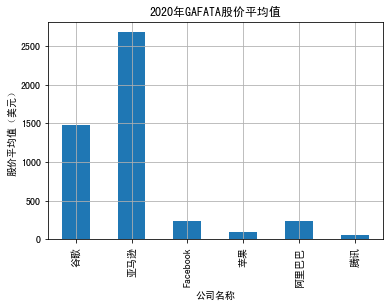

In [83]:
#6家公司股票收盘平均值
gafataMeanList=[googDf['Close'].mean(),amazDf['Close'].mean(),
                FbDf['Close'].mean(),AppDf['Close'].mean(),
                babaDf['Close'].mean(),txDf['Close_dollar'].mean()]

#创建pandas一维数组Series
gafataMeanSer=pd.Series(gafataMeanList,index=['谷歌','亚马逊','Facebook','苹果','阿里巴巴','腾讯'])
gafataMeanSer.plot(kind='bar',label='GAFATA')
#图片标题
plt.title('2020年GAFATA股价平均值')
#x轴文本
plt.xlabel('公司名称')
#y轴文本
plt.ylabel('股价平均值（美元）')
plt.grid(True)
plt.show()

In [ ]:
分析结果：可以看出，仅从股票价格上来判断，亚马逊和谷歌的股票价格要远远的超过了其他四家。
但是这里只是算的平均值，下面我们看下用四分位数绘制的箱线图


In [102]:
#存放6家公司的收盘价
closeDf=pd.DataFrame()
#合并6家公司的收盘价
closeDf=pd.concat([closeDf,googDf['Close'],
                   amazDf['Close'],
                  FbDf['Close'],
                  AppDf['Close'],
                   babaDf['Close'],
                   txDf['Close_dollar']
                  ],axis=1)
#重命名列名为公司名称
closeDf.columns=['谷歌','亚马逊','Facebook','苹果','腾讯','阿里巴巴']
closeDf.head()                   

,谷歌,亚马逊,Facebook,苹果,腾讯,阿里巴巴
2019-12-31 00:00:00,1337.020020,1847.839966,205.250000,73.412498,212.100006,NaN
2020-01-02 00:00:00,1367.369995,1898.010010,209.779999,75.087502,219.770004,48.870719
2020-01-03 00:00:00,1360.660034,1874.969971,208.669998,74.357498,217.000000,48.947400
2020-01-06 00:00:00,1394.209961,1902.880005,212.600006,74.949997,216.639999,48.231719
2020-01-07 00:00:00,1393.339966,1906.859985,213.059998,74.597504,217.630005,49.279681


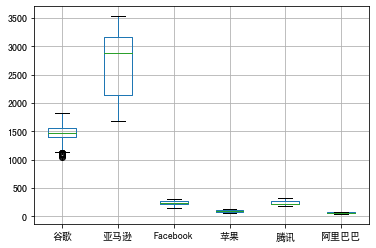

In [96]:
#箱线图
closeDf.plot(kind='box')
plt.grid(True)
plt.show()

![0](images/0.jpg)